# Chapter 2. The Tensorflow Way

## Operations in a Computational Graph

In [2]:
import tensorflow as tf
sess = tf.Session()

### How to do it

In [6]:
import numpy as np
# Define values for my placeholder
x_vals = np.array([1., 3., 5., 7., 9.])
# Define placeholder
x_data = tf.placeholder(tf.float32)
# Define constant
m_const = tf.constant(3.)
# Define operation
my_product = tf.multiply(x_data, m_const)
# Generate computational graph. feed the placeholder and constant into the operation
for x_val in x_vals:
    print(sess.run(my_product, feed_dict={x_data: x_val}))

3.0
9.0
15.0
21.0
27.0


## Layering Nested Operations

### How to do it

In [8]:
# Define values for placeholder
my_array = np.array([[1., 3., 5., 7., 9.],
                   [-2., 0., 2., 4., 6.],
                   [-6., -3., 0., 3., 6.]])
x_vals = np.array([my_array, my_array + 1])
# Define placeholder
x_data = tf.placeholder(tf.float32, shape=(3, 5))

In [10]:
# Define constants
m1 = tf.constant([[1.],[0.],[-1],[2.],[4.]])
m2 = tf.constant([[2.]])
a1 = tf.constant([[10.]])

In [11]:
# Define operations
prod1 = tf.matmul(x_data, m1)
prod2 = tf.matmul(prod1, m2)
add1 = tf.add(prod2, a1)

In [12]:
# Generate computational graph
for x_val in x_vals:
    print(sess.run(add1, feed_dict={x_data: x_val}))

[[ 102.]
 [  66.]
 [  58.]]
[[ 114.]
 [  78.]
 [  70.]]


In [ ]:
x_data = tf.placeholder(tf.float32, shape=(3,None))

## Working with Multiple Layers

In [14]:
import tensorflow as tf
import numpy as np
sess = tf.Session()

In [15]:
x_shape = [1, 4, 4, 1]
x_val = np.random.uniform(size=x_shape)

In [16]:
x_data = tf.placeholder(tf.float32, shape=x_shape)

In [18]:
my_filter = tf.constant(0.25, shape=[2, 2, 1, 1])
my_strides = [1, 2, 2, 1]
mov_avg_layer = tf.nn.conv2d(x_data, my_filter, my_strides, padding='SAME', name='Moving_Avg_Window')

In [21]:
def custom_layer(input_matrix):
    input_matrix_squeezed = tf.squeeze(input_matrix)
    A = tf.constant([[1., 2.],[-1., 3.]])
    b = tf.constant(1., shape=[2, 2])
    temp1 = tf.matmul(A, input_matrix_squeezed)
    temp = tf.add(temp1, b)
    return(tf.sigmoid(temp))

In [22]:
with tf.name_scope('Custom_Layer') as scope:
    custom_layer1 = custom_layer(mov_avg_layer)

In [24]:
print(sess.run(custom_layer1, feed_dict={x_data: x_val}))

[[ 0.9230715   0.9328137 ]
 [ 0.92959523  0.93943596]]


## Implementing Loss Functions

### Regression loss

In [25]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [53]:
x_vals = tf.linspace(-1., 1., 500)
target = tf.constant(0.)

#### 1. L2 norm loss

In [54]:
l2_y_vals = tf.square(target - x_vals)
l2_y_out = sess.run(l2_y_vals)

#### 2. L1 norm loss

In [55]:
l1_y_vals = tf.abs(target - x_vals)
l1_y_out = sess.run(l1_y_vals)

#### 3. Pseudo-Huber loss

In [56]:
delta1 = tf.constant(0.25)
phuber1_y_vals = tf.multiply(tf.square(delta1), tf.sqrt(1. + tf.square((target - x_vals)/delta1)) - 1.)
phuber1_y_out = sess.run(phuber1_y_vals)
delta2 = tf.constant(5.)
phuber2_y_vals = tf.multiply(tf.square(delta2), tf.sqrt(1. + tf.square((target - x_vals)/delta2)) - 1.)
phuber2_y_out = sess.run(phuber2_y_vals)

### Clasification loss

In [34]:
x_vals = tf.linspace(-3., 5., 500)
target = tf.constant(1.)
targets = tf.fill([500,], 1.)

#### 1. Hinge loss

In [35]:
hinge_y_vals = tf.maximum(0., 1. - tf.multiply(target, x_vals))
hinge_y_out = sess.run(hinge_y_vals)

#### 2. Cross entropy loss

In [36]:
xentropy_y_vals = - tf.multiply(target, tf.log(x_vals)) - tf.multiply((1. - target), tf.log(1. - x_vals))
xentropy_y_out = sess.run(xentropy_y_vals)

#### 3. Sigmoid cross entropy loss 

In [40]:
xentropy_sigmoid_y_vals = tf.nn.sigmoid_cross_entropy_with_logits(logits = x_vals, labels = targets)
xentropy_sigmoid_y_out = sess.run(xentropy_sigmoid_y_vals)

#### 4. Weighted cross entropy loss

In [41]:
weight = tf.constant(0.5)
xentropy_weighted_y_vals = tf.nn.weighted_cross_entropy_with_logits(x_vals, targets, weight)
xentropy_weighted_y_out = sess.run(xentropy_weighted_y_vals)

#### 5. Softmax cross entropy loss

In [43]:
unscaled_logits = tf.constant([[1., -3., 10.]])
target_dist = tf.constant([[0.1, 0.02, 0.88]])
softmax_xentropy = tf.nn.softmax_cross_entropy_with_logits(logits=unscaled_logits, labels=target_dist)
print(sess.run(softmax_xentropy))

[ 1.16012561]


#### 6. Sparse softmax cross entropy loss

In [44]:
unscaled_logits = tf.constant([[1., -3., 10.]])
sparse_target_dist = tf.constant([2])
sparse_xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=unscaled_logits, labels=sparse_target_dist)
print(sess.run(sparse_xentropy))

[ 0.00012564]


### How it works

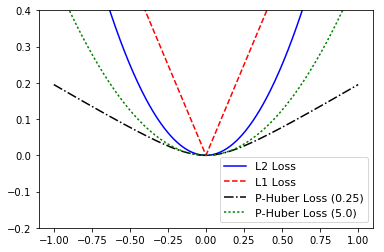

In [57]:
x_array = sess.run(x_vals)
plt.plot(x_array, l2_y_out, 'b-', label='L2 Loss')
plt.plot(x_array, l1_y_out, 'r--', label='L1 Loss')
plt.plot(x_array, phuber1_y_out, 'k-.', label='P-Huber Loss (0.25)')
plt.plot(x_array, phuber2_y_out, 'g:', label='P-Huber Loss (5.0)')
plt.ylim(-0.2, 0.4)
plt.legend(loc='lower right', prop={'size': 11})
plt.show()

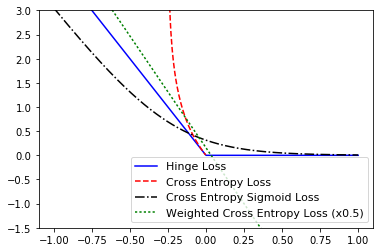

In [58]:
x_array = sess.run(x_vals)
plt.plot(x_array, hinge_y_out, 'b-', label='Hinge Loss')
plt.plot(x_array, xentropy_y_out, 'r--', label='Cross Entropy Loss')
plt.plot(x_array, xentropy_sigmoid_y_out, 'k-.', label='Cross Entropy Sigmoid Loss')
plt.plot(x_array, xentropy_weighted_y_out, 'g:', label='Weighted Cross Entropy Loss (x0.5)')
plt.ylim(-1.5, 3)
plt.legend(loc='lower right', prop={'size': 11})
plt.show()

## Implementing Back Propagation

### Regression Example

In [59]:
import numpy as np
import tensorflow as tf

In [60]:
sess = tf.Session()

In [62]:
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)
x_data = tf.placeholder(shape=[1], dtype=tf.float32)
y_target = tf.placeholder(shape=[1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1]))

In [63]:
my_output = tf.multiply(x_data, A)

In [64]:
loss = tf.square(my_output - y_target)

In [66]:
init = tf.global_variables_initializer()
sess.run(init)

In [67]:
my_opt = tf.train.GradientDescentOptimizer(learning_rate=0.02)
train_step = my_opt.minimize(loss)

In [72]:
for i in range(100):
    rand_index = np.random.choice(100)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%5==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        print('Loss = ' + str(sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})))

Step #5 A = [ 9.95021439]
Loss = [ 0.39455804]
Step #10 A = [ 9.9741478]
Loss = [ 0.0777922]
Step #15 A = [ 10.03340721]
Loss = [ 1.23022842]
Step #20 A = [ 10.03472996]
Loss = [ 0.10583636]
Step #25 A = [ 10.04978085]
Loss = [ 0.01724895]
Step #30 A = [ 9.91337872]
Loss = [ 0.17133641]
Step #35 A = [ 10.11779308]
Loss = [ 0.06014416]
Step #40 A = [ 10.08452034]
Loss = [ 0.00389303]
Step #45 A = [ 10.17895794]
Loss = [ 0.01163678]
Step #50 A = [ 10.05815029]
Loss = [ 0.02332587]
Step #55 A = [ 10.061306]
Loss = [ 0.06690516]
Step #60 A = [ 10.08861542]
Loss = [ 0.08209644]
Step #65 A = [ 10.00679684]
Loss = [ 0.16783722]
Step #70 A = [ 9.96562576]
Loss = [ 0.01691987]
Step #75 A = [ 10.02491379]
Loss = [ 0.00348888]
Step #80 A = [ 10.08917999]
Loss = [ 1.74142754]
Step #85 A = [ 10.13511181]
Loss = [ 0.61702758]
Step #90 A = [ 10.00839901]
Loss = [ 0.0037815]
Step #95 A = [ 9.89783764]
Loss = [ 0.06167164]
Step #100 A = [ 9.76904678]
Loss = [ 2.10856891]


### Classification Example

In [83]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()

In [84]:
x_vals = np.concatenate((np.random.normal(-1, 1, 50),np.random.normal(3, 1, 50)))
y_vals = np.concatenate((np.repeat(0., 50), np.repeat(1., 50)))
x_data = tf.placeholder(shape=[1], dtype=tf.float32)
y_target = tf.placeholder(shape=[1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(mean=10, shape=[1]))

In [85]:
my_output = tf.add(x_data, A)

In [86]:
my_output_expanded = tf.expand_dims(my_output, 0)
y_target_expanded = tf.expand_dims(y_target, 0)

In [87]:
init = tf.global_variables_initializer()
sess.run(init)

In [88]:
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=my_output_expanded, labels=y_target_expanded)

In [89]:
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(xentropy)

In [90]:
for i in range(1400):
    rand_index = np.random.choice(100)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%100==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        print('Loss = ' + str(sess.run(xentropy, feed_dict={x_data: rand_x, y_target: rand_y})))
    

Step #100 A = [ 4.8318696]
Loss = [[ 0.00033971]]
Step #200 A = [ 2.64506149]
Loss = [[ 0.00418655]]
Step #300 A = [ 1.30739641]
Loss = [[ 1.09664488]]
Step #400 A = [ 0.51736683]
Loss = [[ 0.26572165]]
Step #500 A = [-0.09545731]
Loss = [[ 0.01278189]]
Step #600 A = [-0.51216048]
Loss = [[ 0.10664516]]
Step #700 A = [-0.78637862]
Loss = [[ 0.08945212]]
Step #800 A = [-0.86072451]
Loss = [[ 0.02882713]]
Step #900 A = [-0.87271821]
Loss = [[ 0.01990283]]
Step #1000 A = [-0.92608452]
Loss = [[ 0.09307004]]
Step #1100 A = [-0.88328761]
Loss = [[ 0.02991422]]
Step #1200 A = [-0.97590894]
Loss = [[ 0.09927668]]
Step #1300 A = [-1.00551438]
Loss = [[ 0.04025564]]
Step #1400 A = [-1.02826095]
Loss = [[ 0.53540313]]


### How it works

1. Created the data
2. Initialized placeholders and variables
3. Created a loss function
4. Defined an optimization algorithm
5. And finally, iterated across random data samples to iteratively update our variables

## Working with Batch and Stochastic Training

In [111]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
sess = tf.Session()

In [114]:
batch_size = 20

In [115]:
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))

In [116]:
my_output = tf.matmul(x_data, A)

In [117]:
init = tf.global_variables_initializer()
sess.run(init)

In [118]:
loss = tf.reduce_mean(tf.square(my_output - y_target))

In [119]:
my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(loss)

In [120]:
loss_batch = []
for i in range(100):
    rand_index = np.random.choice(100, size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    
    if (i+1)%5==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        print('Loss = ' + str(temp_loss))
        loss_batch.append(temp_loss)

Step #5 A = [[ 0.72457075]]
Loss = 85.84
Step #10 A = [[ 2.42347813]]
Loss = 57.6792
Step #15 A = [[ 3.80782747]]
Loss = 39.6865
Step #20 A = [[ 4.94188786]]
Loss = 27.0771
Step #25 A = [[ 5.87083721]]
Loss = 17.8322
Step #30 A = [[ 6.62244177]]
Loss = 10.1657
Step #35 A = [[ 7.2336936]]
Loss = 8.29525
Step #40 A = [[ 7.72658014]]
Loss = 4.52377
Step #45 A = [[ 8.12392616]]
Loss = 4.82434
Step #50 A = [[ 8.46831608]]
Loss = 2.78002
Step #55 A = [[ 8.73760509]]
Loss = 2.91336
Step #60 A = [[ 8.96225643]]
Loss = 2.22172
Step #65 A = [[ 9.12013817]]
Loss = 1.72059
Step #70 A = [[ 9.29175854]]
Loss = 2.31993
Step #75 A = [[ 9.4136095]]
Loss = 1.09419
Step #80 A = [[ 9.49522114]]
Loss = 1.01279
Step #85 A = [[ 9.55999756]]
Loss = 1.29504
Step #90 A = [[ 9.61558342]]
Loss = 0.441251
Step #95 A = [[ 9.63061237]]
Loss = 0.819351
Step #100 A = [[ 9.7198801]]
Loss = 0.82015


### How it works

In [105]:

loss_stochastic = []
for i in range(100):
    rand_index = np.random.choice(100)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%5==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        print('Loss = ' + str(temp_loss))
        loss_stochastic.append(temp_loss)

ValueError: Cannot feed value of shape (1,) for Tensor 'Placeholder_2:0', which has shape '(?, 1)'

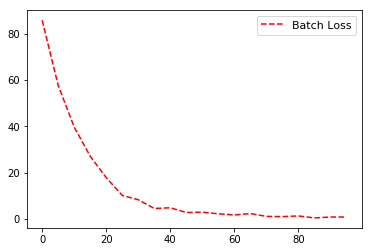

In [121]:
plt.plot(range(0, 100, 5), loss_batch, 'r--', label='Batch Loss')
plt.legend(loc='upper right', prop={'size':11})
plt.show()

## Combining Everything Together

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn  import datasets
import tensorflow as tf
sess = tf.Session()

In [42]:
iris = datasets.load_iris()
binary_target = np.array([1. if x==0 else 0. for x in iris.target])
iris_2d = np.array([[x[2],x[3]] for x in iris.data])

In [43]:
batch_size = 20
x1_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
x2_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A1 = tf.Variable(tf.random_normal(shape=[1, 1]))
A2 = tf.Variable(tf.random_normal(shape=[1, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))

In [44]:
my_mult1 = tf.matmul(x1_data, A1)
my_mult2 = tf.matmul(x2_data, A2)
my_add = tf.add(my_mult1, my_mult2)
my_output = tf.add(b, my_add)

In [45]:
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=my_output, labels=y_target)

In [46]:
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(xentropy)

In [47]:
init = tf.global_variables_initializer()
sess.run(init)

In [48]:
loss_batch = []
for i in range(1000):
    rand_index = np.random.choice(len(iris_2d), size=batch_size)
    rand_x = iris_2d[rand_index]
    rand_x1 = np.array([[x[0]] for x in rand_x])
    rand_x2 = np.array([[x[1]] for x in rand_x])
    rand_y = np.array([[y] for y in binary_target[rand_index]])
    sess.run(train_step, feed_dict={x1_data: rand_x1, x2_data: rand_x2, y_target: rand_y})
    if (i+1)%100==0:
        print('Step #' + str(i+1) + ' A1 = ' + str(sess.run(A1)) + ' A2 = ' + str(sess.run(A2)) +', b = ' + str(sess.run(b)))
        temp_loss = sess.run(xentropy, feed_dict={x1_data: rand_x1, x2_data: rand_x2, y_target: rand_y})
        temp_loss = np.mean(temp_loss)
        print('    Loss = ' + str(temp_loss))
        loss_batch.append(temp_loss)

Step #100 A1 = [[-0.93846262]] A2 = [[-3.03033972]], b = [[ 4.5046792]]
    Loss = 0.0388807
Step #200 A1 = [[-1.36455393]] A2 = [[-3.55815053]], b = [[ 5.82502985]]
    Loss = 0.0300816
Step #300 A1 = [[-1.57525694]] A2 = [[-3.84611988]], b = [[ 6.58057737]]
    Loss = 0.0227821
Step #400 A1 = [[-1.6706363]] A2 = [[-4.05270195]], b = [[ 7.18719292]]
    Loss = 0.0265054
Step #500 A1 = [[-1.81949556]] A2 = [[-4.22710848]], b = [[ 7.62430048]]
    Loss = 0.00286793
Step #600 A1 = [[-1.92090988]] A2 = [[-4.35940599]], b = [[ 8.02461624]]
    Loss = 0.00816932
Step #700 A1 = [[-2.05985618]] A2 = [[-4.49800587]], b = [[ 8.32792473]]
    Loss = 0.00594853
Step #800 A1 = [[-2.0422461]] A2 = [[-4.58031988]], b = [[ 8.63638783]]
    Loss = 0.00452616
Step #900 A1 = [[-2.1979847]] A2 = [[-4.70576859]], b = [[ 8.84821701]]
    Loss = 0.00874273
Step #1000 A1 = [[-2.20030308]] A2 = [[-4.77289867]], b = [[ 9.09464169]]
    Loss = 0.00690821


## Evaluating Models

### Regression

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
sess = tf.Session()
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
batch_size = 25
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]
A = tf.Variable(tf.random_normal(shape=[1,1]))

In [63]:
my_output = tf.matmul(x_data, A)
loss = tf.reduce_mean(tf.square(my_output - y_target))
init = tf.global_variables_initializer()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(loss)

In [64]:
for i in range(100):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = np.transpose([x_vals_train[rand_index]])
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%25==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        print('Loss = ' + str(sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})))

Step #25 A = [[ 5.19483185]]
Loss = 24.2688
Step #50 A = [[ 8.27855301]]
Loss = 4.66678
Step #75 A = [[ 9.39485645]]
Loss = 1.48062
Step #100 A = [[ 9.81585217]]
Loss = 1.32604


In [65]:
mse_test = sess.run(loss, feed_dict={x_data: np.transpose([x_vals_test]), y_target: np.transpose([y_vals_test])})
mse_train = sess.run(loss, feed_dict={x_data: np.transpose([x_vals_train]), y_target: np.transpose([y_vals_train])})
print('MSE on test:' + str(np.round(mse_test, 2)))
print('MSE on train:' + str(np.round(mse_train, 2)))

MSE on test:0.65
MSE on train:1.06


### Classification

In [66]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()
batch_size = 25
x_vals = np.concatenate((np.random.normal(-1, 1, 50), np.random.normal(2, 1, 50)))
y_vals = np.concatenate((np.repeat(0., 50), np.repeat(1., 50)))
x_data = tf.placeholder(shape=[1, None], dtype=tf.float32)
y_target = tf.placeholder(shape=[1, None], dtype=tf.float32)
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]
A = tf.Variable(tf.random_normal(mean=10, shape=[1]))

In [67]:
my_output = tf.add(x_data, A)
init = tf.global_variables_initializer()
sess.run(init)
xentropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=my_output, labels=y_target))
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(xentropy)

In [68]:
for i in range(1800):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = [x_vals_train[rand_index]]
    rand_y = [y_vals_train[rand_index]]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%200==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        print('Loss = ' + str(sess.run(xentropy, feed_dict={x_data: rand_x, y_target: rand_y})))

Step #200 A = [ 3.86951709]
Loss = 1.00566
Step #400 A = [ 0.79543406]
Loss = 0.522784
Step #600 A = [-0.01703473]
Loss = 0.319856
Step #800 A = [-0.2484335]
Loss = 0.243706
Step #1000 A = [-0.26292068]
Loss = 0.239906
Step #1200 A = [-0.27840427]
Loss = 0.327356
Step #1400 A = [-0.30117148]
Loss = 0.25587
Step #1600 A = [-0.30318218]
Loss = 0.269823
Step #1800 A = [-0.31900543]
Loss = 0.333768


In [69]:
y_prediction = tf.squeeze(tf.round(tf.nn.sigmoid(tf.add(x_data, A))))
correct_prediction = tf.equal(y_prediction, y_target)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
acc_value_test = sess.run(accuracy, feed_dict={x_data: [x_vals_test], y_target: [y_vals_test]})
acc_value_train = sess.run(accuracy, feed_dict={x_data: [x_vals_train], y_target: [y_vals_train]})
print('Accuracy on train set: ' + str(acc_value_train))
print('Accuracy on test set: ' + str(acc_value_test))

Accuracy on train set: 0.9
Accuracy on test set: 0.95
